# Exploring feature gradients

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

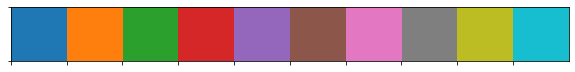

In [2]:
palette = sb.color_palette()
sb.palplot(palette)

In [3]:
data_af = pd.read_csv("gradients-adj->features.csv.gz", compression='gzip')
data_af['connected'] = data_af.dist_uv == 1
data_af['is_prediction_correct'] = data_af.connected == (data_af.prediction > 0)
data_af['is_target'] = data_af.dist_uorv == 0
ngrad_af = 10
grad_af_names = ['grad{}'.format(i) for i in range(1, 1 + ngrad_af)]

data_af_long = pd.melt(data_af, id_vars=['u', 'v', 'node', 'dist_uv', 'dist_uorv',
                                         'connected', 'is_target', 'is_prediction_correct'],
                       value_vars=grad_af_names, var_name='grad_dim')
data_af_long['abs_value'] = np.abs(data_af_long.value)

In [4]:
data_ae = pd.read_csv("gradients-adj->embeddings.csv.gz", compression='gzip')
data_ae['connected'] = data_ae.dist_uv == 1
data_ae['is_prediction_correct'] = data_ae.connected == (data_ae.prediction > 0)

# Remove gradients w.r.t. feature-only embedding dimensions, they're all zeros (since we only took the gradient for adj prediction)
ngrad_ae = 16
ngrad_ae_features = 8
ngrad_ae_adj = 8
grad_ae_names = ['grad{}'.format(i) for i in range(1, 1 + ngrad_ae)]
grad_ae_features_names = ['grad{}'.format(i) for i in range(1 + ngrad_ae, 1 + ngrad_ae + ngrad_ae_features)]
grad_ae_adj_names = ['grad{}'.format(i) for i in range(1, 1 + ngrad_ae_adj)]
grad_ae_ov_names = ['grad{}'.format(i) for i in range(1 + ngrad_ae_adj, 1 + ngrad_ae)]
data_ae = data_ae[filter(lambda c: c not in grad_ae_features_names, data_ae.columns)]

# # Split rows into two depending on whether a gradient comes from an overlap dimension or not
# nongrad_cols = ['u', 'v', 'node', 'dist_uv', 'connected']
# _grad_values = data_ae[grad_ae_names].values
# _double_grad_values = np.zeros((_grad_values.shape[0] * 2, ngrad_ae_adj), dtype=_grad_values.dtype)
# _double_grad_values[::2, :] = _grad_values[:, :ngrad_ae_adj]
# _double_grad_values[1::2, :] = _grad_values[:, ngrad_ae_adj:]
# _other_values = data_ae[nongrad_cols].values
# _double_other_values = np.repeat(_other_values, 2, axis=0)
# 
# data_ae = pd.DataFrame(data=_double_grad_values, columns=grad_ae_adj_names)
# for i, col in enumerate(nongrad_cols):
#     data_ae[col] = _double_other_values[:, i]
# data_ae['overlap'] = np.tile([False, True], _grad_values.shape[0])
# 
# # Melt into long form
# data_ae_long = pd.melt(data_ae, id_vars=['u', 'v', 'node', 'dist_uv', 'connected', 'overlap'],
#                        value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_ae_features)], var_name='grad_dim')

# Melt into long form
data_ae_long = pd.melt(data_ae, id_vars=['u', 'v', 'node', 'dist_uv', 'connected', 'is_prediction_correct'],
                       value_vars=grad_ae_names, var_name='grad_dim')
data_ae_long['abs_value'] = np.abs(data_ae_long.value)

In [5]:
data_ef = pd.read_csv("gradients-embeddings->features.csv.gz", compression='gzip')
data_ef['is_target'] = data_ef.dist_u == 0
ngrad_ef = 10
grad_ef_names = ['grad{}'.format(i) for i in range(1, 1 + ngrad_ef)]

data_ef_long = pd.melt(data_ef, id_vars=['embdim', 'u', 'node', 'dist_u', 'is_target'],
                       value_vars=grad_ef_names, var_name='grad_dim')
data_ef_long['abs_value'] = np.abs(data_ef_long.value)

## Plans

Features:
1. activities / ?
2. [ok] tv shows / cinema
3. [ok] horoscope
4. [ok] politique / public affairs
5. [ok] foot
6. [ok] bac/brevet
7. [ok] public movements
8. tech/séries/online
9. [ok] world cup
10. politique/beaucoup d'autres choses

**link prediction → features**

- [x] distribution of gradients w.r.t. connected yes/no, neighbourhood yes/no
- [x] ... absolute values
- [x] distribution of ranks of each dimension w.r.t. connected yes/no, neighbourhood yes/no
- [x] ... ranks of absolute values
- [x] correlation of ranks between the 2 sides of each link, w.r.t. connected yes/no
- [x] ... ranks of absolute values

**link prediction → embeddings**

- [x] distribution of gradients w.r.t. connected yes/no, overlap yes/no
- [x] ... absolute values
- [x] ... ranks of each dimension
- [x] ... ranks of absolute values
- [x] overlap yes/no w.r.t. rank of each dimension
- [x] correlation of ranks between the 2 sides of each link, w.r.t. connected yes/no

**embeddings → features**
- [x] distribution of gradients w.r.t. neighbourhood yes/no => which features influence which embedding dimensions, which features fall in overlap yes/no
- [x] ... ranks of each dimension

**Comparisons**

- distributions: means + std + CI for both
- rank correlation: [Rank correlation](https://en.wikipedia.org/wiki/Rank_correlation)
- significance of difference in rank distribution: ?

**additions**

- [x] whether the link prediction is correct or not → facet along that

## Reading on interpretability

- [x] https://arxiv.org/pdf/1903.03768.pdf
- [x] https://medium.com/stellargraph/https-medium-com-stellargraph-saliency-maps-for-graph-machine-learning-5cca536974da
- [x] https://distill.pub/2018/building-blocks/
- [x] https://github.com/ramprs/grad-cam

# Paper (https://icwsm.org/2020/#posters)

-> put in overleaf

Before christmas:
- results
- reading
- bullet points of sections

## Introduction

- motivation from previous paper, reformulated for twitter (importance of attributed networks)

## Literature

- previous paper, but shorter (half page)
- plus interpretation of models:
  - different techniques. GradCam, etc.
- must support the assumptions we take, that gradients indicate what is important

## Method

- model (short)
- gradient method

## Data

- twitter

## Results

- which features are most (gradient-)important for predicting a link
- do those fall in overlap or not
- correlation of feature ranks when connected or not
- confirmations:
  - path features->embeddings fits the features->link and embeddings->link importances
  - important features are the same when restricted to good predictions only

## Conclusion

---

## Link prediction → features

**distribution of gradients w.r.t. connected yes/no, neighbourhood yes/no**

Tells us which gradients are important for link prediction (in targets or neigbourhoods), whether nodes are actually connected or not

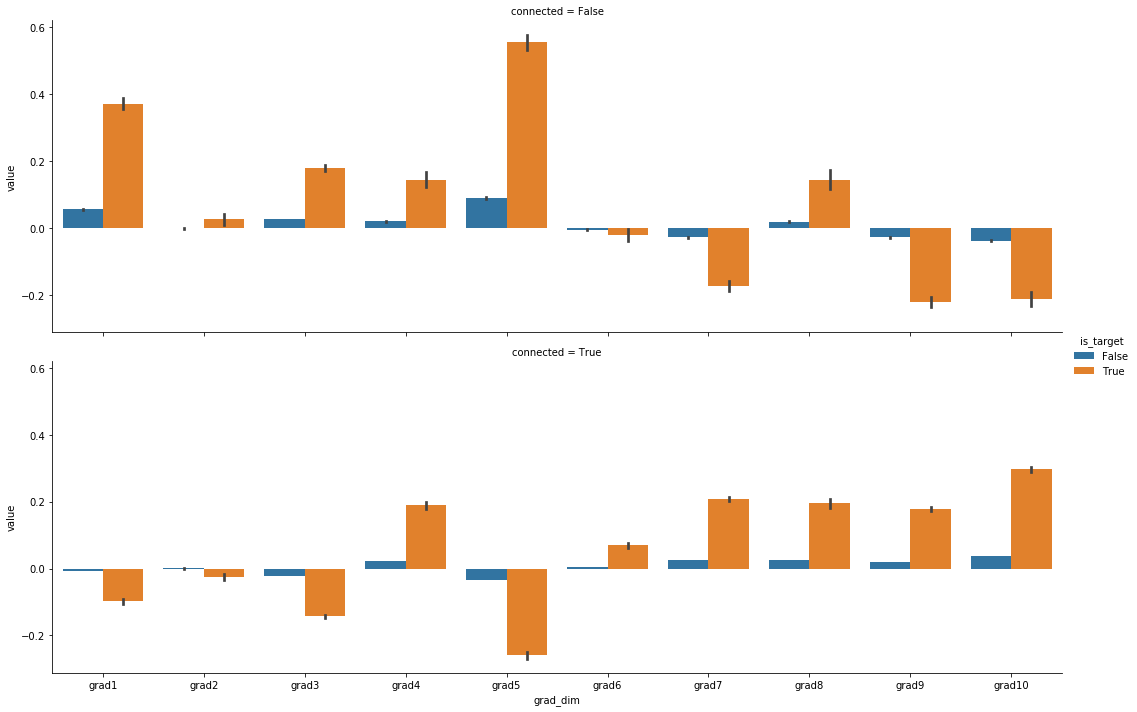

In [8]:
g = sb.catplot(x='grad_dim', y='value', hue='is_target', row='connected', data=data_af_long, kind='bar', aspect=3)
g.set_axis_labels('Topic number', 'Average gradient')

In [ ]:
g.set_

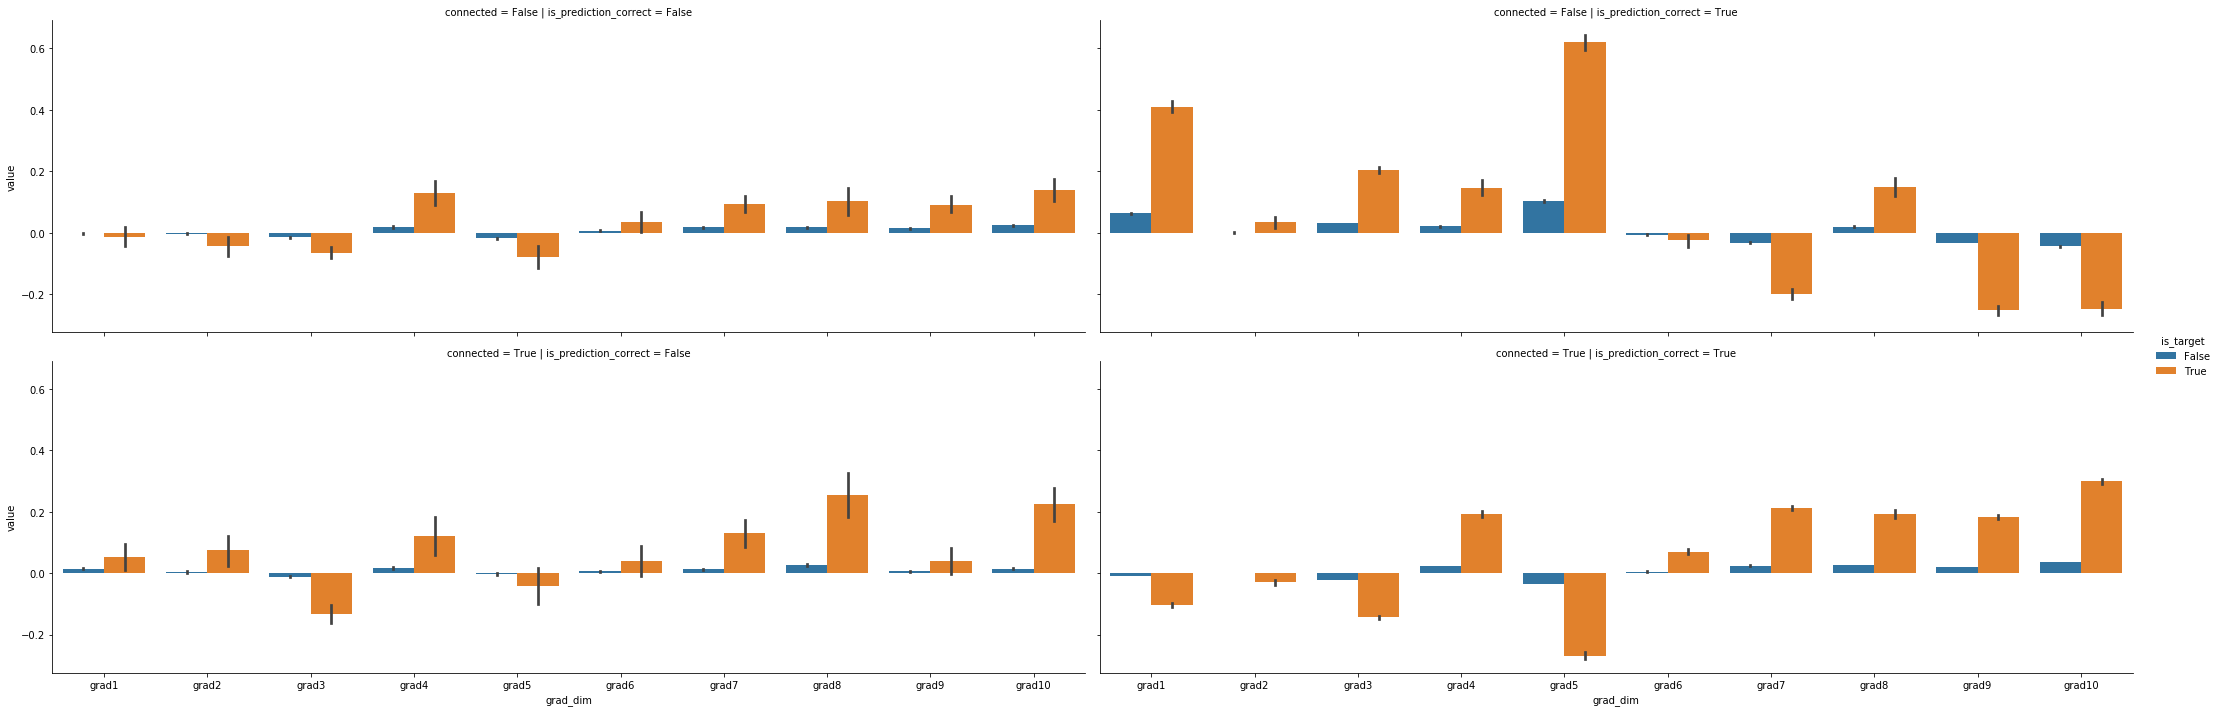

In [12]:
sb.catplot(x='grad_dim', y='value', hue='is_target', row='connected', col='is_prediction_correct', data=data_af_long, kind='bar', aspect=3)

What we see:
- smaller magnitude for neighbourhoods but same pattern
- different sign of the influence of features when connected or not

Hard to interpret more, esp. the difference between connected or not (what does the sign mean?)

**Now with `abs(value)`**

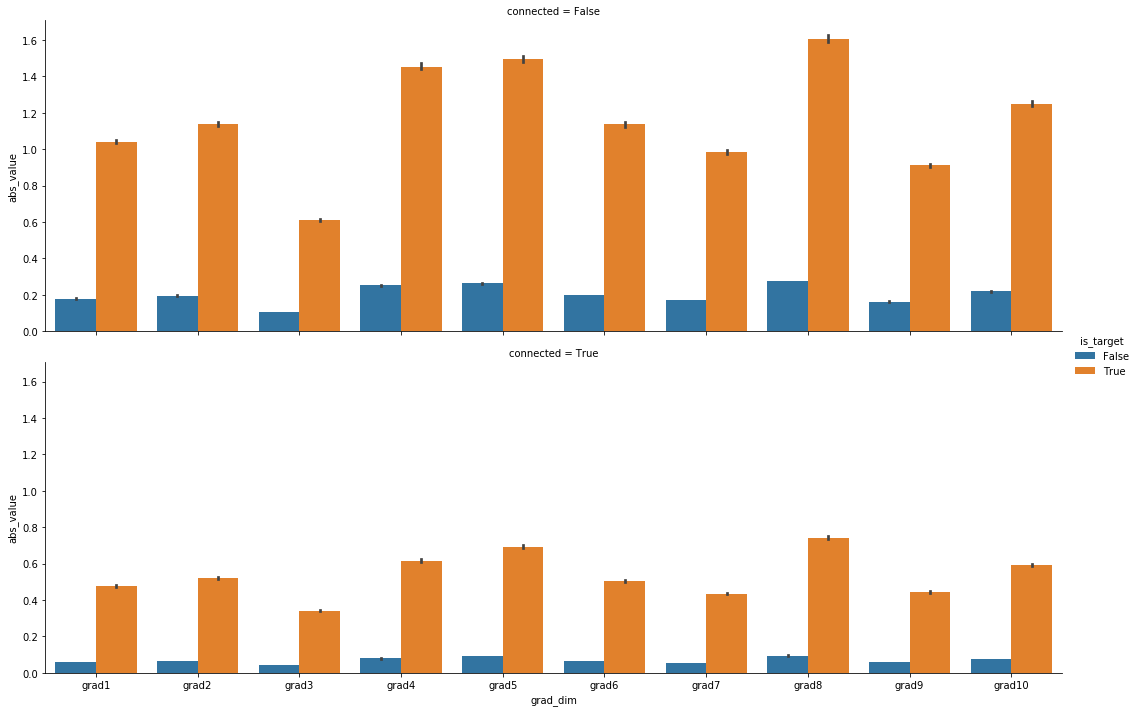

In [8]:
sb.catplot(x='grad_dim', y='abs_value', hue='is_target', row='connected', data=data_af_long, kind='bar', aspect=3)

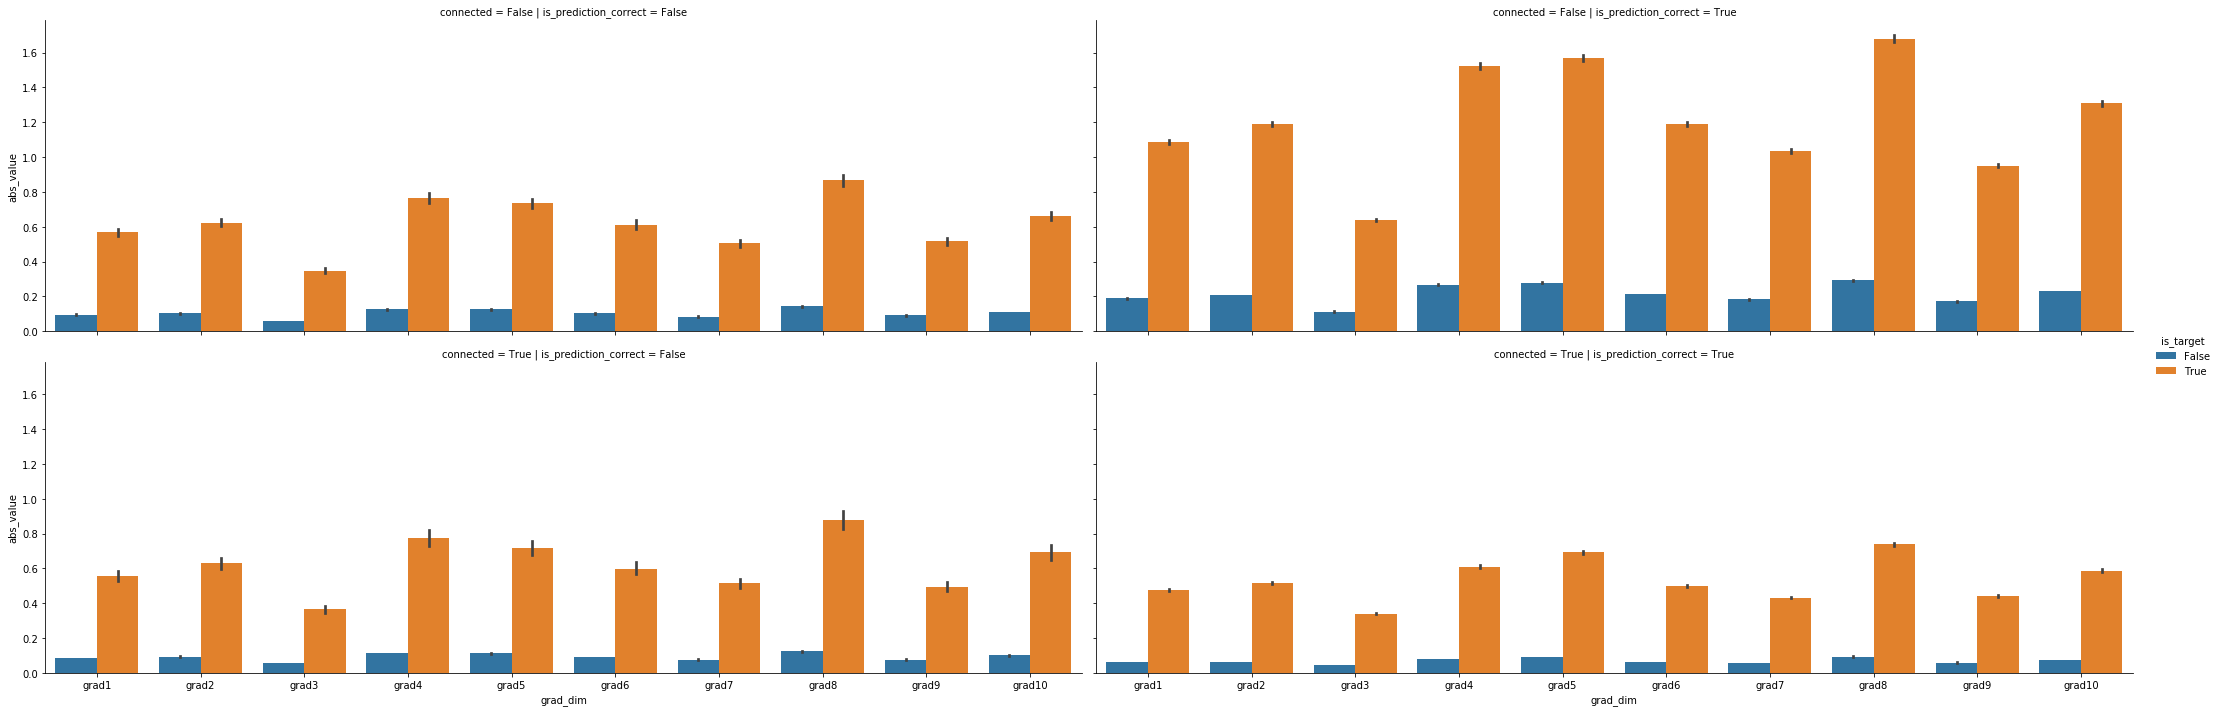

In [13]:
sb.catplot(x='grad_dim', y='abs_value', hue='is_target', row='connected', col='is_prediction_correct', data=data_af_long, kind='bar', aspect=3)

Here the patterns seem the same between connected or not

**Drop `connected` facet**

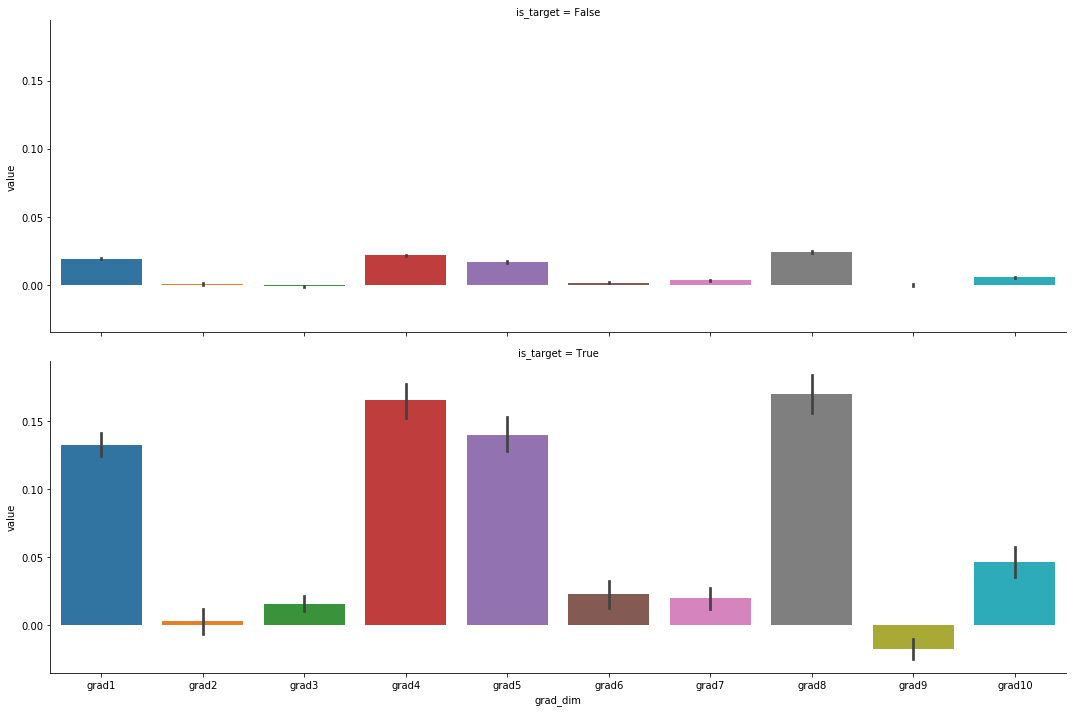

In [5]:
sb.catplot(x='grad_dim', y='value', row='is_target', data=data_af_long, kind='bar', aspect=3)

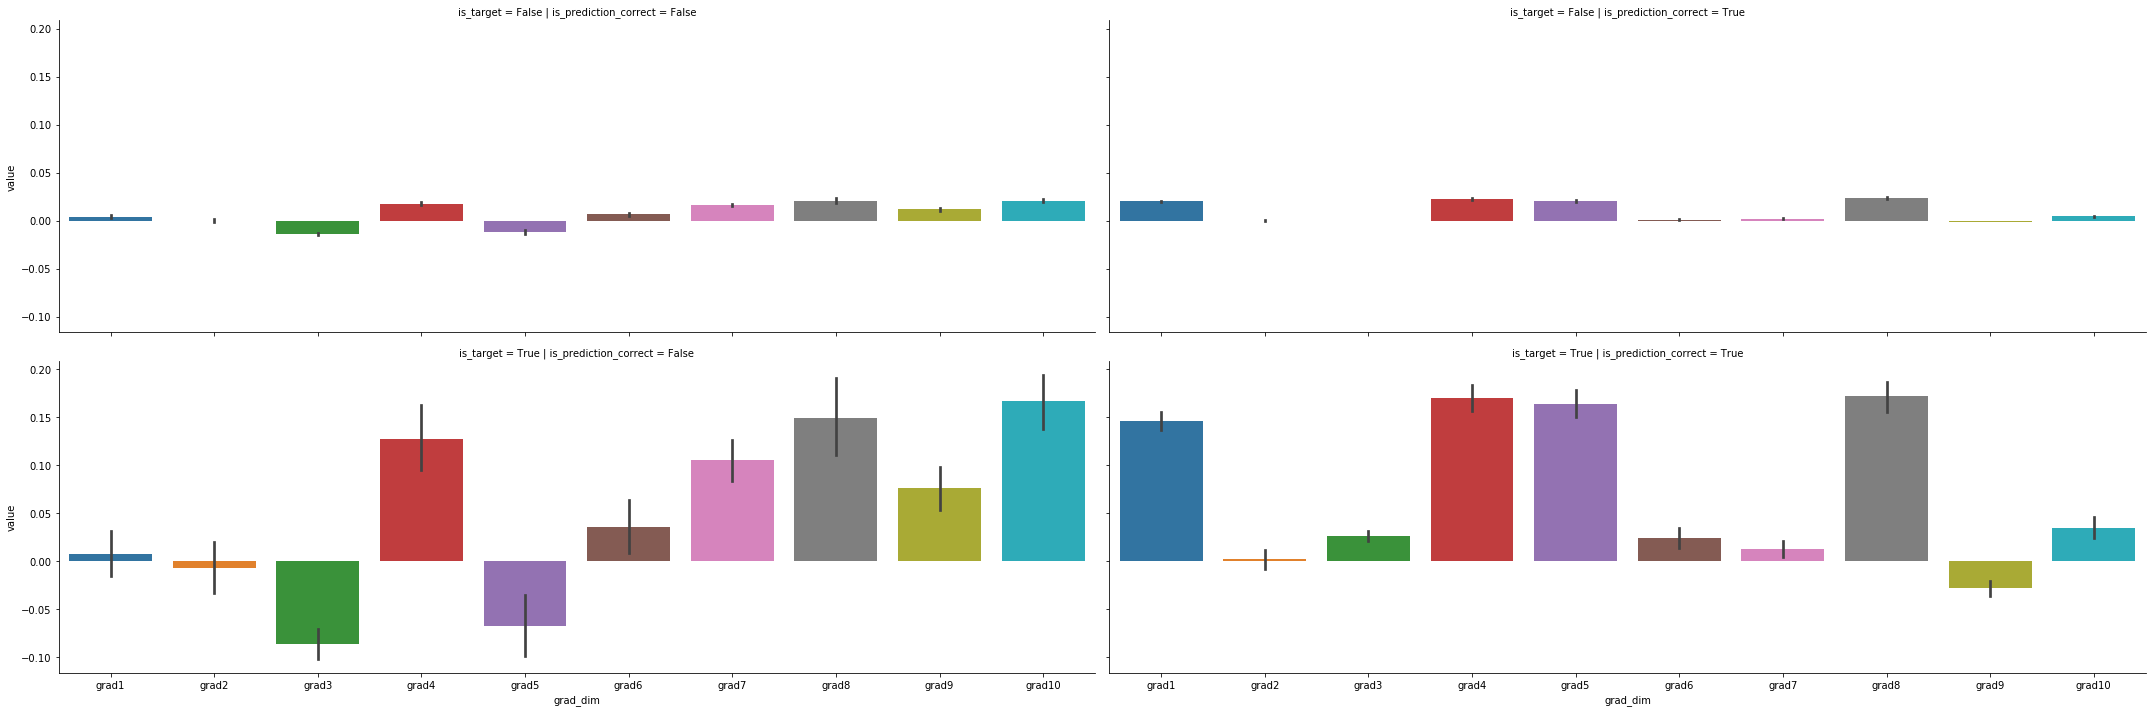

In [14]:
sb.catplot(x='grad_dim', y='value', row='is_target', col='is_prediction_correct', data=data_af_long, kind='bar', aspect=3)

**Now with `abs(value)`**

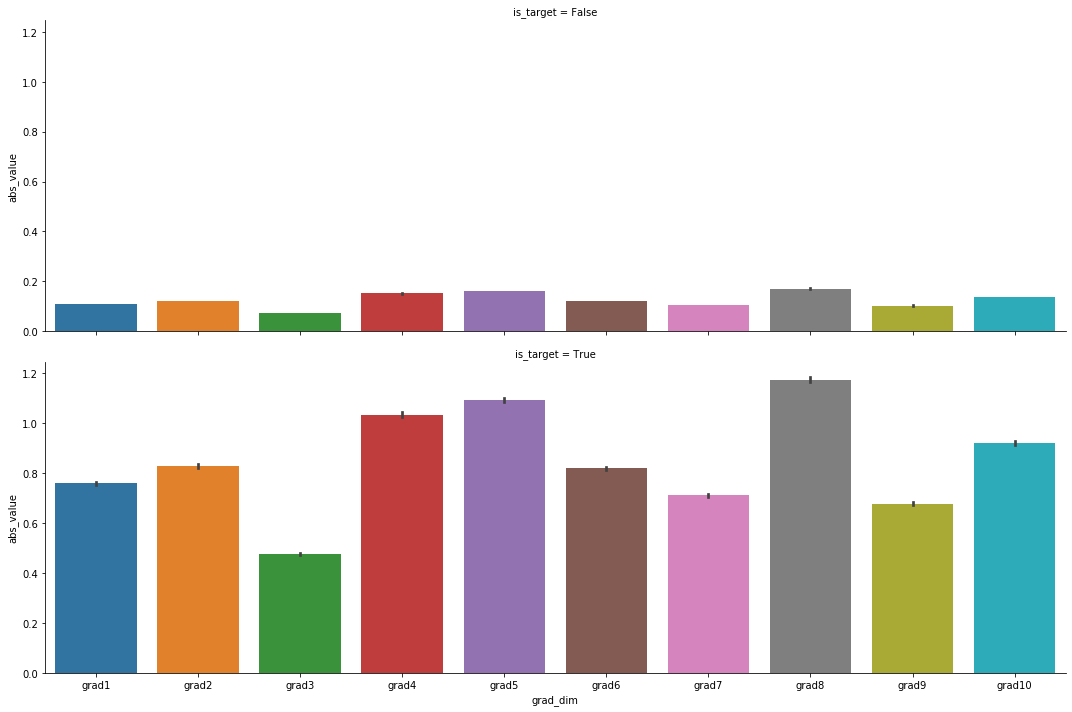

In [7]:
sb.catplot(x='grad_dim', y='abs_value', row='is_target', data=data_af_long, kind='bar', aspect=3)

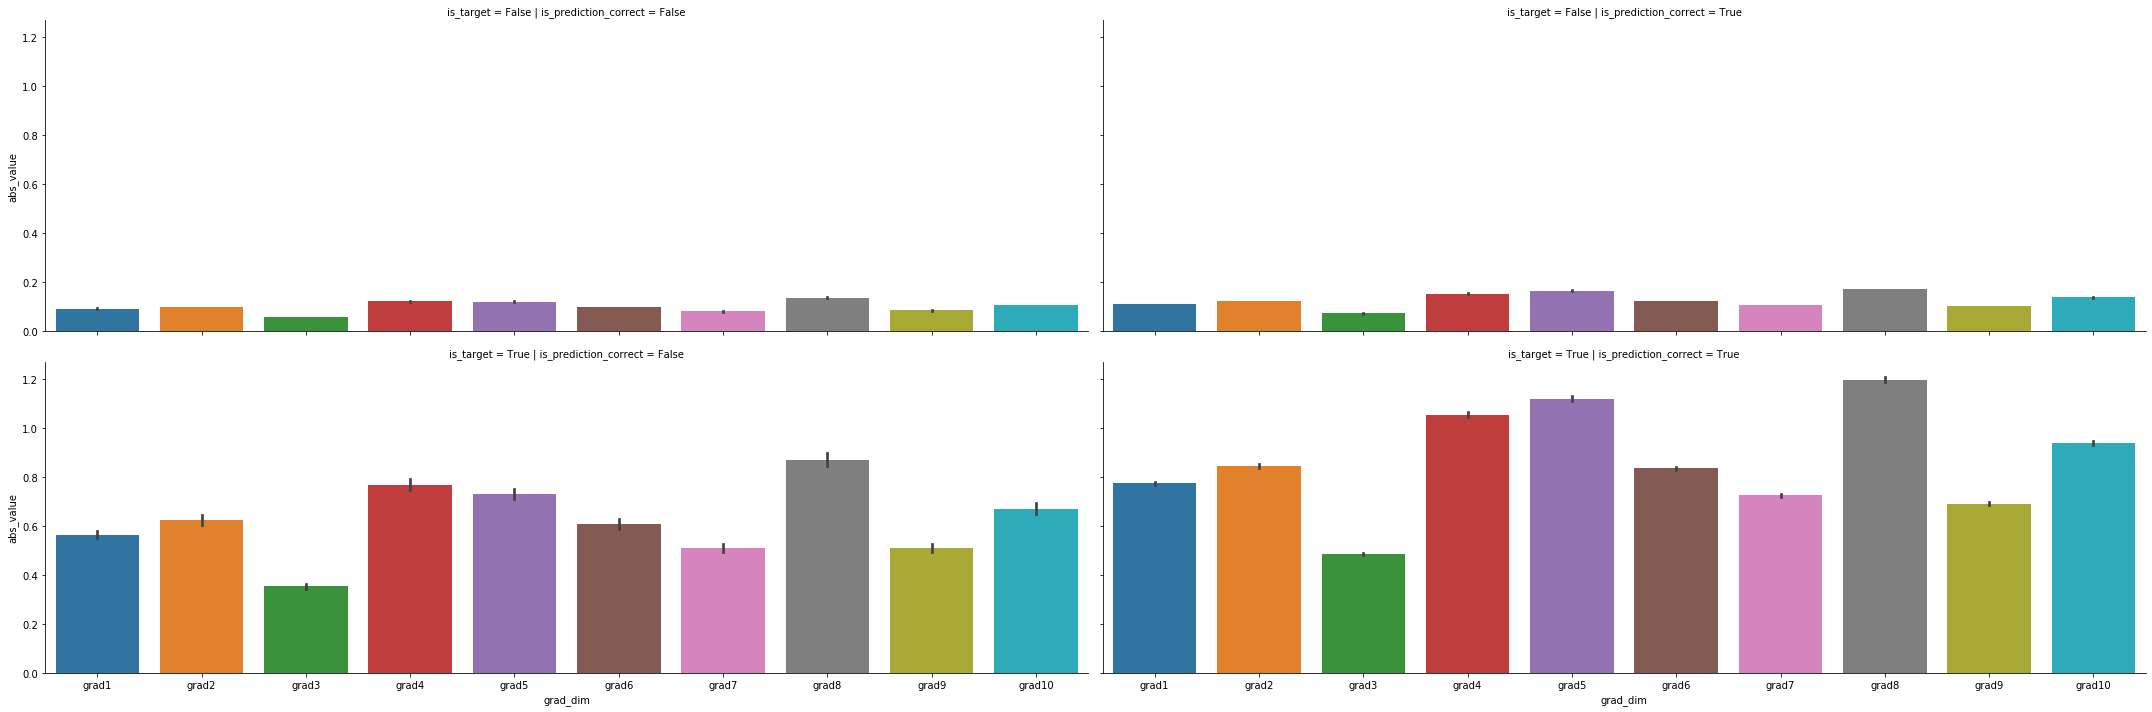

In [26]:
sb.catplot(x='grad_dim', y='abs_value', row='is_target', col='is_prediction_correct', data=data_af_long, kind='bar', aspect=3)

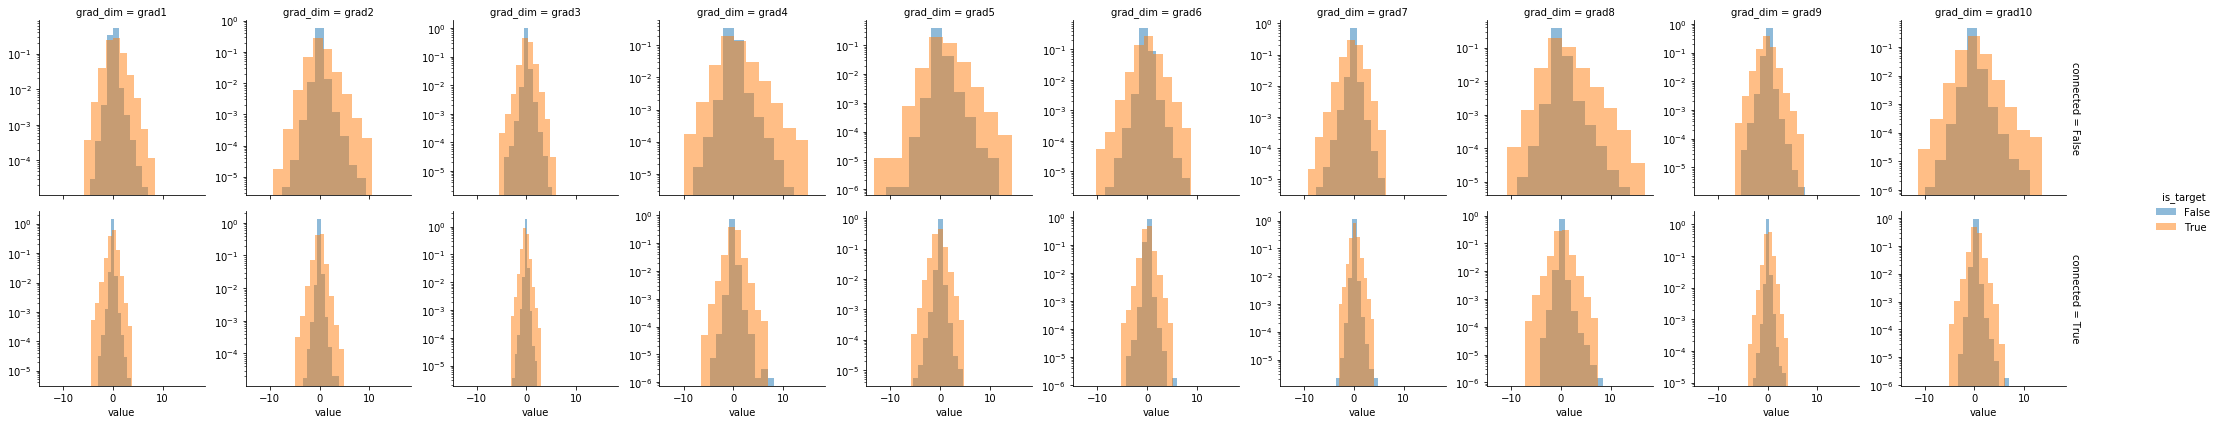

In [8]:
g = sb.FacetGrid(data_af_long, hue='is_target', col='grad_dim', row='connected', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, log=True)
g.add_legend()

In [ ]:
g = sb.FacetGrid(data_af_long[~data_af_long.is_prediction_correct], hue='is_target', col='grad_dim', row='connected', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, log=True)
g.add_legend()

In [ ]:
g = sb.FacetGrid(data_af_long[data_af_long.is_prediction_correct], hue='is_target', col='grad_dim', row='connected', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, log=True)
g.add_legend()

---

## Link prediction → features

**distribution of ranks of each dimension w.r.t. connected yes/no, neighbourhood yes/no**

In [8]:
def ranks(df, cols, transform=None):
    df_ranks = df.copy()
    values = df_ranks.iloc[:, cols].values
    if transform is not None:
        values = transform(values)
    values_argsorted = np.argsort(values)
    nrows = df_ranks.shape[0]
    values[np.arange(nrows).reshape(nrows, -1), values_argsorted] = np.tile(np.arange(cols.start, cols.stop), (nrows, 1))
    df_ranks.iloc[:, cols] = values.astype(int)
    return df_ranks

In [6]:
data_af_ranks = ranks(data_af, slice(0, ngrad_af))
data_af_ranks_long = pd.melt(data_af_ranks, id_vars=['u', 'v', 'node', 'dist_uv', 'dist_uorv',
                                                     'connected', 'is_target', 'is_prediction_correct'],
                             value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_af)], var_name='grad_dim')

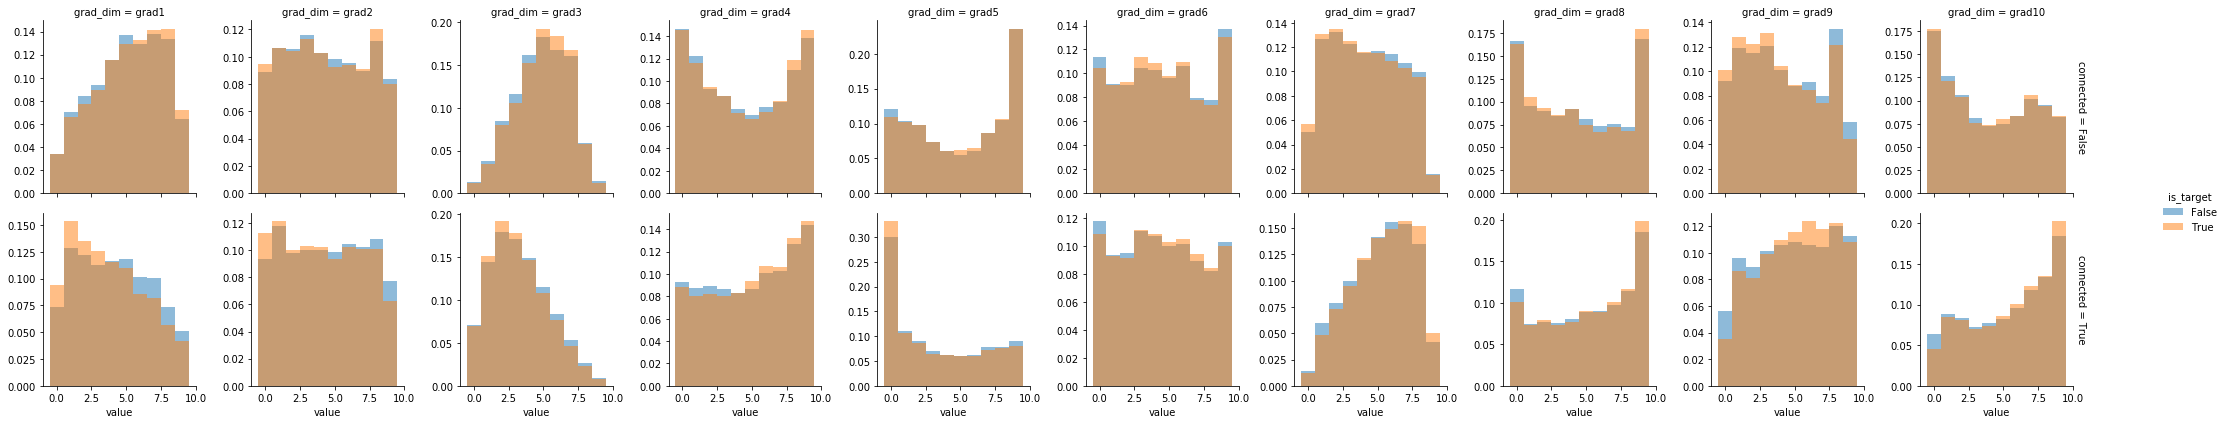

In [72]:
g = sb.FacetGrid(data_af_ranks_long, hue='is_target', col='grad_dim', row='connected', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_af) - .5)
g.add_legend()

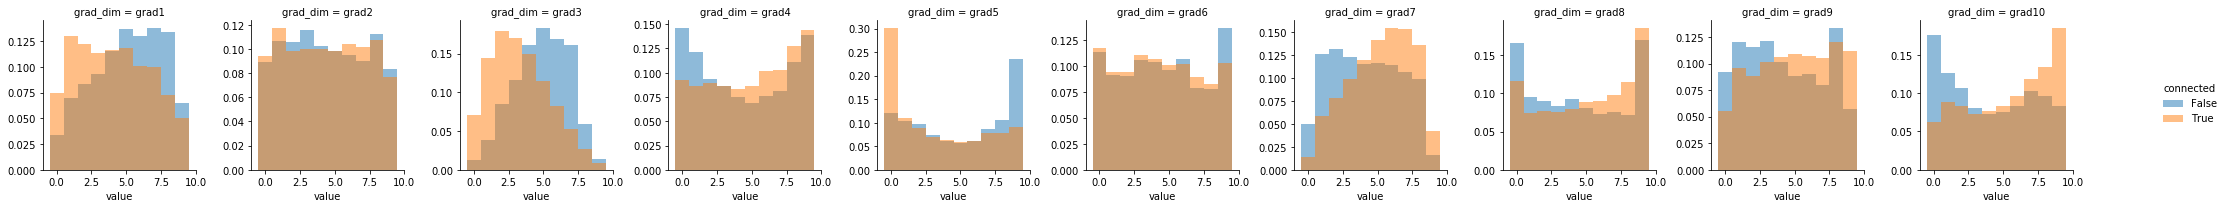

In [21]:
g = sb.FacetGrid(data_af_ranks_long, hue='connected', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_af) - .5)
g.add_legend()

- skewness changes between connected and not
- neigbourhood/not has nearly no effect

**Now with ranks of `abs(grad)`**

In [23]:
data_af_abs_ranks = ranks(data_af, slice(0, ngrad_af), transform=np.abs)
data_af_abs_ranks_long = pd.melt(data_af_abs_ranks, id_vars=['u', 'v', 'node', 'dist_uv', 'dist_uorv',
                                                             'connected', 'is_target'],
                                 value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_af)], var_name='grad_dim')

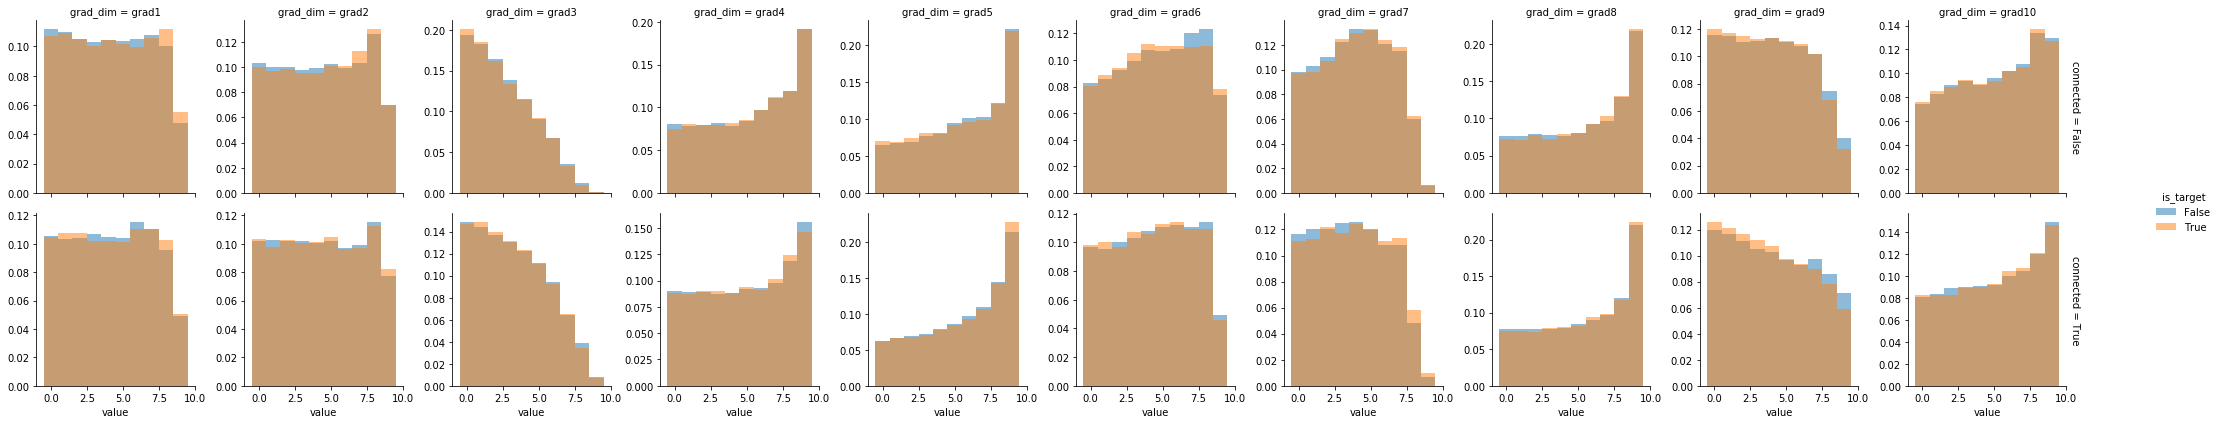

In [74]:
g = sb.FacetGrid(data_af_abs_ranks_long, hue='is_target', col='grad_dim', row='connected', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_af) - .5)
g.add_legend()

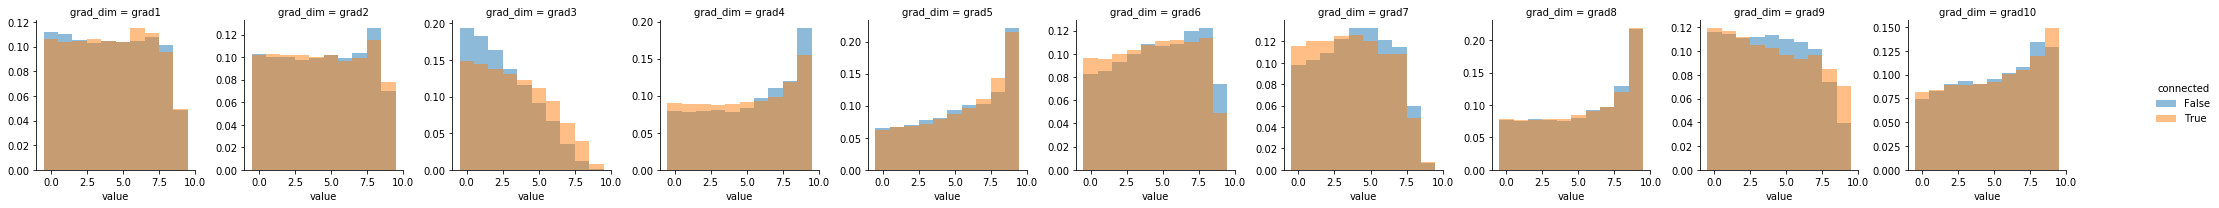

In [24]:
g = sb.FacetGrid(data_af_abs_ranks_long, hue='connected', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_af) - .5)
g.add_legend()

Here the difference between connected/not goes away: so it's all in the sign of the gradients

---

## Link prediction → features

**correlation of ranks between the 2 sides of each link, w.r.t. connected yes/no**

In [7]:
def two_rows_tau(rows):
    corr, p = scipy.stats.kendalltau(rows.iloc[0], rows.iloc[1])
    return pd.Series(data=[corr, p], index=['correlation', 'p'])

def two_rows_sign_pearson(rows):
    corr, p = scipy.stats.pearsonr(np.sign(rows.iloc[0]), np.sign(rows.iloc[1]))
    return pd.Series(data=[corr, p], index=['correlation', 'p'])

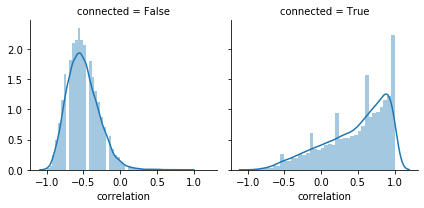

In [24]:
data_af_ranks_tau = data_af_ranks[data_af_ranks.is_target]\
    .groupby(['u', 'v', 'connected', 'is_prediction_correct'])[grad_af_names]\
    .apply(two_rows_tau).reset_index()
g = sb.FacetGrid(data=data_af_ranks_tau, col='connected')
g.map(sb.distplot, 'correlation')

- when connected, ranks agree
- when disconnected, ranks seem anticorrelated -> being not connected is not just a matter of decorrelation, it goes with a particular pattern of anticorrelation

Checking this by looking at correlations of `sign(grad)`:

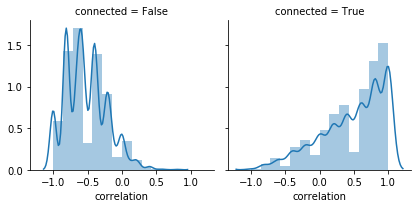

In [20]:
data_af_sign_pearson = data_af[data_af.is_target]\
    .groupby(['u', 'v', 'connected', 'is_prediction_correct'])[grad_af_names]\
    .apply(two_rows_sign_pearson).reset_index()
g = sb.FacetGrid(data=data_af_sign_pearson, col='connected')
g.map(sb.distplot, 'correlation', bins=np.linspace(-1, 1, 15))

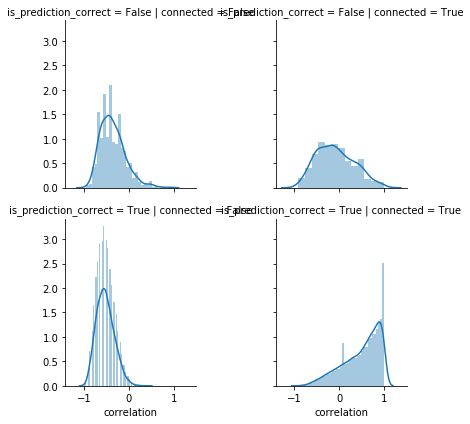

In [20]:
data_af_ranks_tau = data_af_ranks[data_af_ranks.is_target]\
    .groupby(['u', 'v', 'connected', 'is_prediction_correct'])[grad_af_names]\
    .apply(two_rows_tau).reset_index()
g = sb.FacetGrid(data=data_af_ranks_tau, col='connected', row='is_prediction_correct')
g.map(sb.distplot, 'correlation')

**Now with ranks of `abs(grad)`**

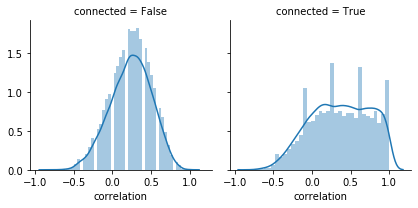

In [25]:
data_af_abs_ranks_tau = data_af_abs_ranks[data_af_abs_ranks.is_target]\
    .groupby(['u', 'v', 'connected', 'is_prediction_correct'])[grad_af_names]\
    .apply(two_rows_tau).reset_index()
g = sb.FacetGrid(data=data_af_abs_ranks_tau, col='connected')
g.map(sb.distplot, 'correlation')

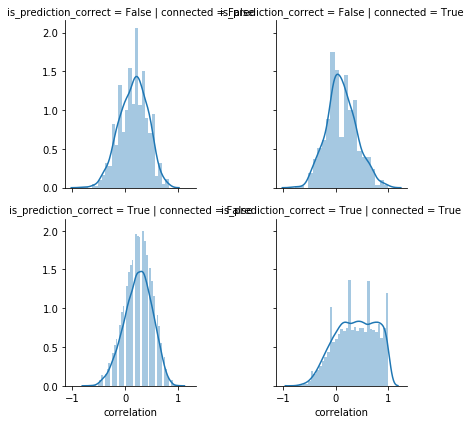

In [23]:
data_af_abs_ranks_tau = data_af_abs_ranks[data_af_abs_ranks.is_target]\
    .groupby(['u', 'v', 'connected', 'is_prediction_correct'])[grad_af_names]\
    .apply(two_rows_tau).reset_index()
g = sb.FacetGrid(data=data_af_abs_ranks_tau, col='connected', row='is_prediction_correct')
g.map(sb.distplot, 'correlation')

- when connected, ranks of abs(grad) still agree mostly
- when disconnected, ranks of abs(grad) seem more independent

---

## Link prediction → embeddings

**distribution of gradients w.r.t. connected yes/no, overlap yes/no**

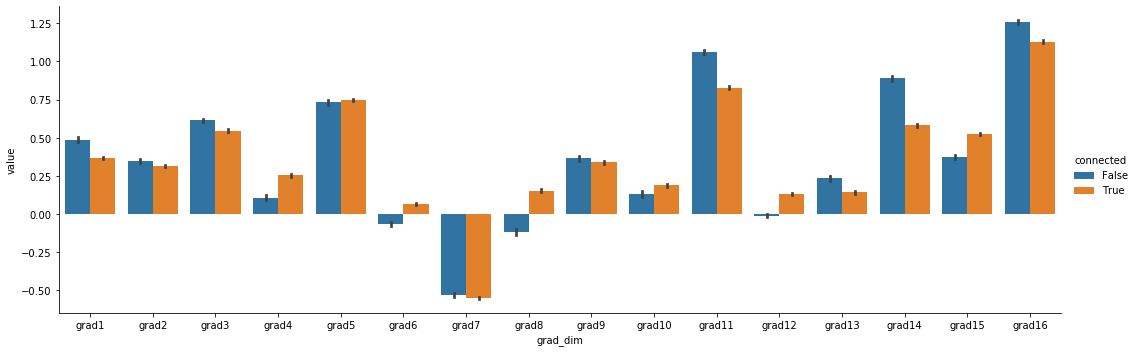

In [19]:
sb.catplot(x='grad_dim', y='value', hue='connected', data=data_ae_long, kind='bar', aspect=3)

- overlap (9-16) has greater magnitudes
- signs agree between connected or not

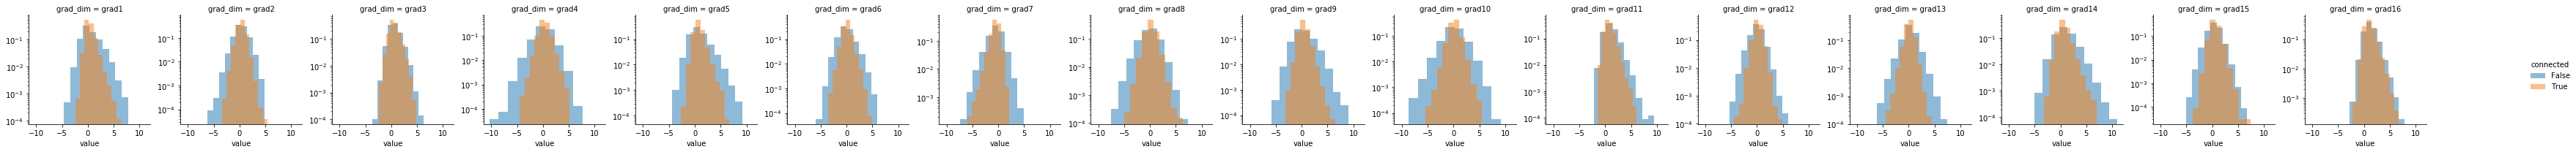

In [20]:
g = sb.FacetGrid(data_ae_long, hue='connected', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, log=True)
g.add_legend()

---

## Link prediction → embeddings

**distribution of ranks of each dimension w.r.t. connected yes/no, overlap yes/no**

In [26]:
data_ae_ranks = ranks(data_ae, slice(0, ngrad_ae))
data_ae_ranks_long = pd.melt(data_ae_ranks, id_vars=['u', 'v', 'node', 'dist_uv', 'connected'],
                             value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_ae)], var_name='grad_dim')

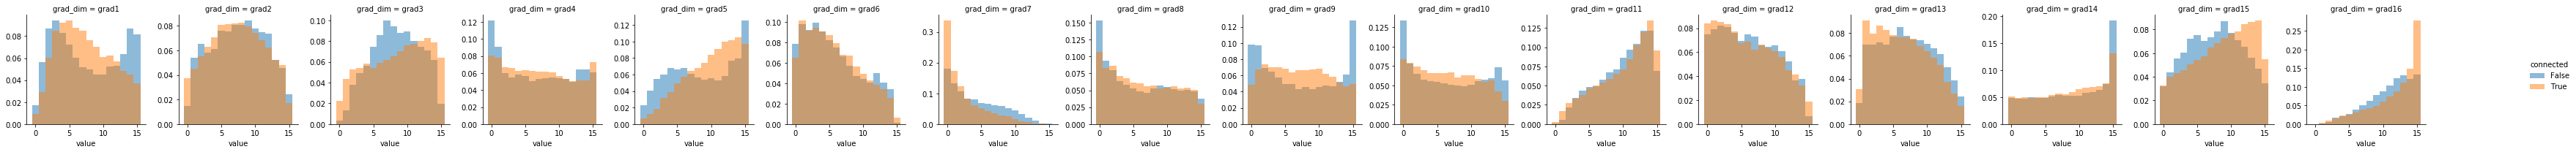

In [76]:
g = sb.FacetGrid(data_ae_ranks_long, hue='connected', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_ae) - .5)
g.add_legend()

- in overlap (9-16), connected/not seem to have ranks that agree more

**Now with ranks of `abs(grad)`**

In [27]:
data_ae_abs_ranks = ranks(data_ae, slice(0, ngrad_ae), transform=np.abs)
data_ae_abs_ranks_long = pd.melt(data_ae_abs_ranks, id_vars=['u', 'v', 'node', 'dist_uv', 'connected'],
                                 value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_ae)], var_name='grad_dim')

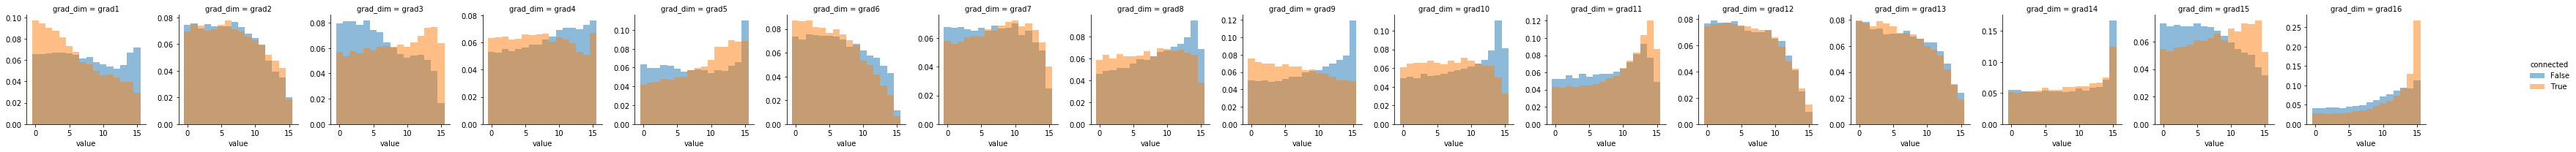

In [78]:
g = sb.FacetGrid(data_ae_abs_ranks_long, hue='connected', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_ae) - .5)
g.add_legend()

- in overlap (9-16), agreement is reduced

---

## Link prediction → embeddings

**overlap yes/no w.r.t. rank of each dimension**

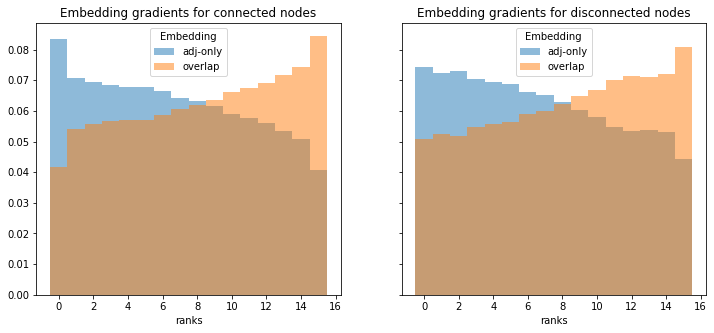

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1.hist(data_ae_ranks_long[data_ae_ranks_long.grad_dim.isin(grad_ae_adj_names) & data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[0], label='adj-only')
ax1.hist(data_ae_ranks_long[data_ae_ranks_long.grad_dim.isin(grad_ae_ov_names) & data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[1], label='overlap')
ax1.set_title('Embedding gradients for connected nodes')
ax1.set_xlabel('ranks')
ax1.legend(title='Embedding')
ax2.hist(data_ae_ranks_long[data_ae_ranks_long.grad_dim.isin(grad_ae_adj_names) & ~data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[0], label='adj-only')
ax2.hist(data_ae_ranks_long[data_ae_ranks_long.grad_dim.isin(grad_ae_ov_names) & ~data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[1], label='overlap')
ax2.set_title('Embedding gradients for disconnected nodes')
ax2.set_xlabel('ranks')
ax2.legend(title='Embedding')

- overlap gradients have higher ranks
- when nodes are disconnected, adj-only embedding gradients are less weak

**Now with ranks of `abs(grad)`**

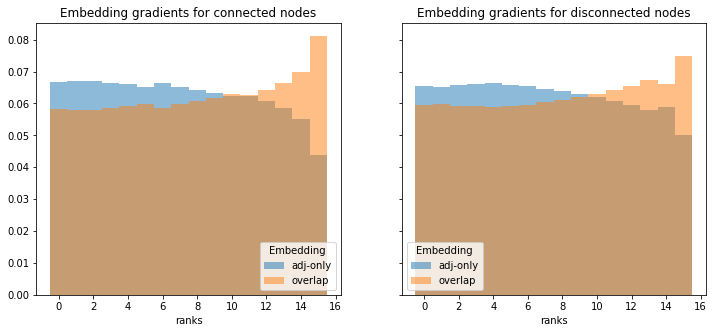

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1.hist(data_ae_abs_ranks_long[data_ae_abs_ranks_long.grad_dim.isin(grad_ae_adj_names) & data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[0], label='adj-only')
ax1.hist(data_ae_abs_ranks_long[data_ae_abs_ranks_long.grad_dim.isin(grad_ae_ov_names) & data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[1], label='overlap')
ax1.set_title('Embedding gradients for connected nodes')
ax1.set_xlabel('ranks')
ax1.legend(title='Embedding', loc='lower right')
ax2.hist(data_ae_abs_ranks_long[data_ae_abs_ranks_long.grad_dim.isin(grad_ae_adj_names) & ~data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[0], label='adj-only')
ax2.hist(data_ae_abs_ranks_long[data_ae_abs_ranks_long.grad_dim.isin(grad_ae_ov_names) & ~data_ae_ranks_long.connected].value, density=True,
         bins=np.arange(1 + ngrad_ae) - .5, alpha=.5, color=palette[1], label='overlap')
ax2.set_title('Embedding gradients for disconnected nodes')
ax2.set_xlabel('ranks')
ax2.legend(title='Embedding', loc='lower left')

- for ranks of abs(grad), overlap has the most "biggest gradients", but for ranks 0-12 it's mostly flat on both sides
- when nodes are disconnected, adj-only embedding gradients are less weak

---

## Link prediction → embeddings

**correlation of ranks between the 2 sides of each link, w.r.t. connected yes/no**

Ranks of gradients for all embeddings

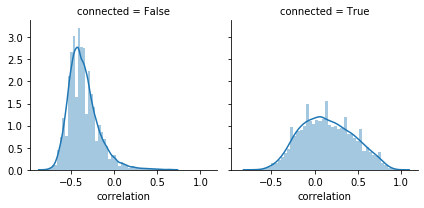

In [52]:
g = sb.FacetGrid(data=ranks(data_ae, slice(0, ngrad_ae)).groupby(['u', 'v', 'connected'])[grad_ae_names].apply(two_rows_tau).reset_index(),
                 col='connected', margin_titles=True)
g.map(sb.distplot, 'correlation')

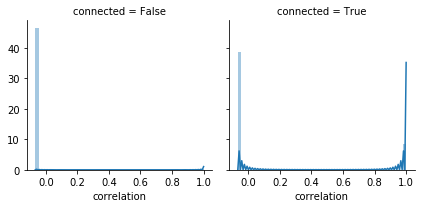

In [44]:
g = sb.FacetGrid(data=ranks(data_ae, slice(0, ngrad_ae)).groupby(['u', 'v', 'connected'])[grad_ae_names].apply(two_rows_sign_pearson).reset_index(),
                 col='connected', margin_titles=True)
g.map(sb.distplot, 'correlation')

Ranks of gradients for adj-only embeddings

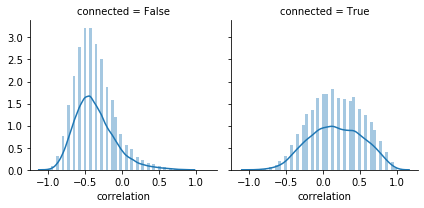

In [56]:
g = sb.FacetGrid(data=ranks(data_ae, slice(0, ngrad_ae_adj)).groupby(['u', 'v', 'connected'])[grad_ae_adj_names].apply(two_rows_tau).reset_index(),
                 col='connected', margin_titles=True)
g.map(sb.distplot, 'correlation')

Ranks of gradients for overlap embeddings

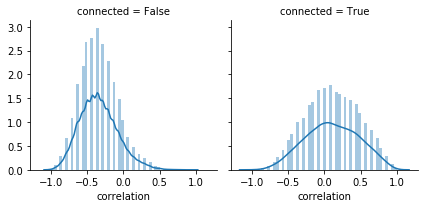

In [79]:
g = sb.FacetGrid(data=ranks(data_ae, slice(ngrad_ae_adj, ngrad_ae)).groupby(['u', 'v', 'connected'])[grad_ae_ov_names].apply(two_rows_tau).reset_index(),
                 col='connected', margin_titles=True)
g.map(sb.distplot, 'correlation')

---

## Embeddings → features

**distribution of gradients w.r.t. neighbourhood yes/no**

=> which features influence which embedding dimensions, which features fall in overlap yes/no

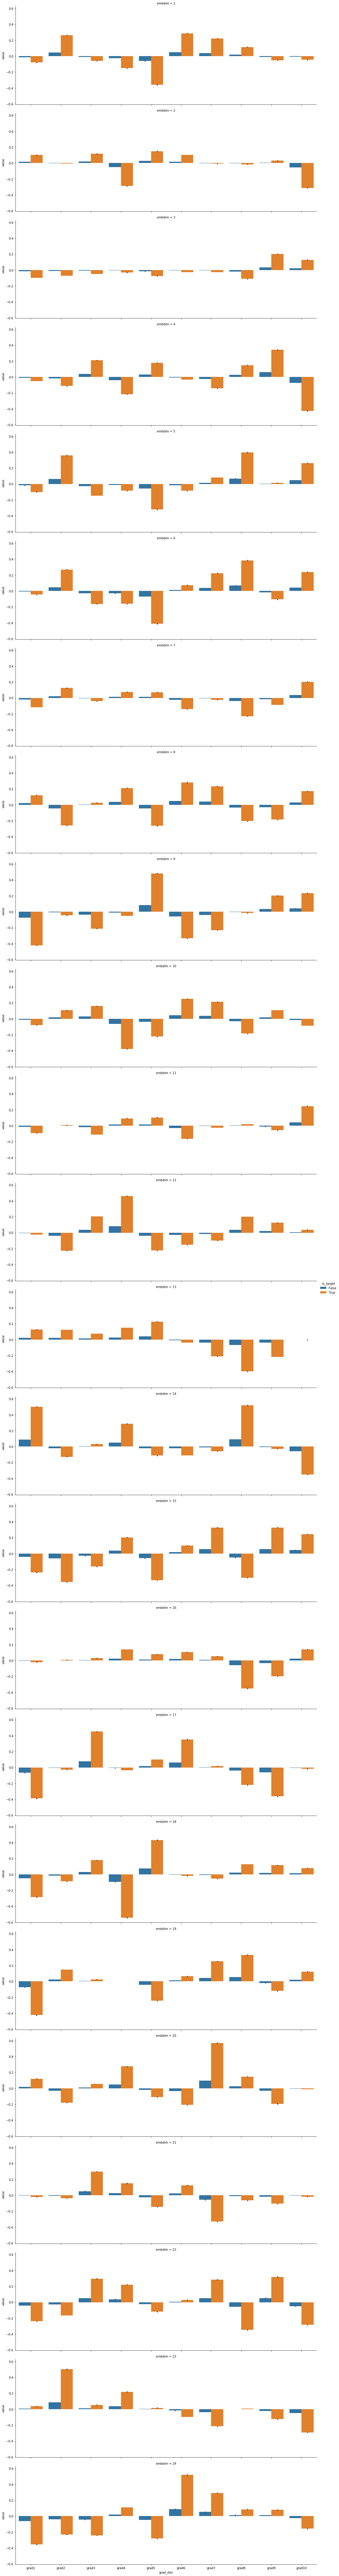

In [6]:
sb.catplot(x='grad_dim', y='value', hue='is_target', row='embdim', data=data_ef_long, kind='bar', aspect=3)

Adj-only embdims

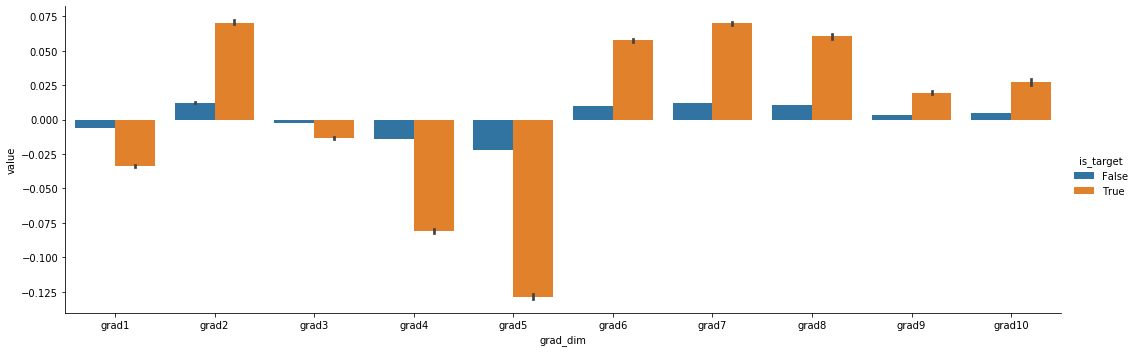

In [14]:
sb.catplot(x='grad_dim', y='value', hue='is_target', data=data_ef_long[data_ef_long.embdim.isin(list(range(1, 9)))], kind='bar', aspect=3)

Overlap embdims

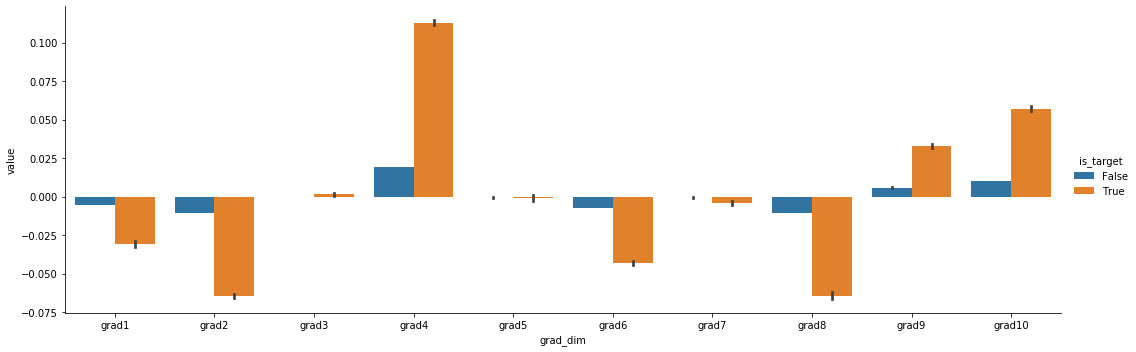

In [15]:
sb.catplot(x='grad_dim', y='value', hue='is_target', data=data_ef_long[data_ef_long.embdim.isin(list(range(9, 17)))], kind='bar', aspect=3)

Feature-only embdims

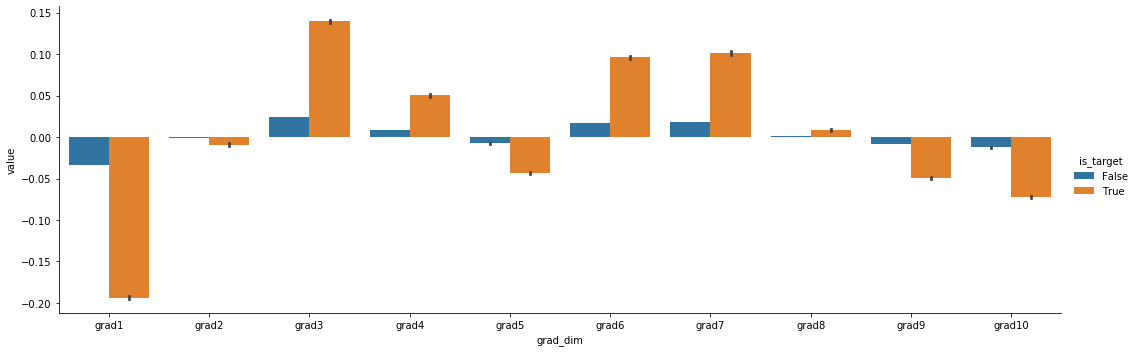

In [16]:
sb.catplot(x='grad_dim', y='value', hue='is_target', data=data_ef_long[data_ef_long.embdim.isin(list(range(17, 25)))], kind='bar', aspect=3)

---

## Embeddings → features

**distribution of ranks of gradients w.r.t. connected yes/no, neighbourhood yes/no**

In [9]:
data_ef_ranks = ranks(data_ef, slice(0, ngrad_ef))
data_ef_ranks_long = pd.melt(data_ef_ranks, id_vars=['embdim', 'u', 'node', 'dist_u', 'is_target'],
                             value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_ef)], var_name='grad_dim')

Adj-only embdims

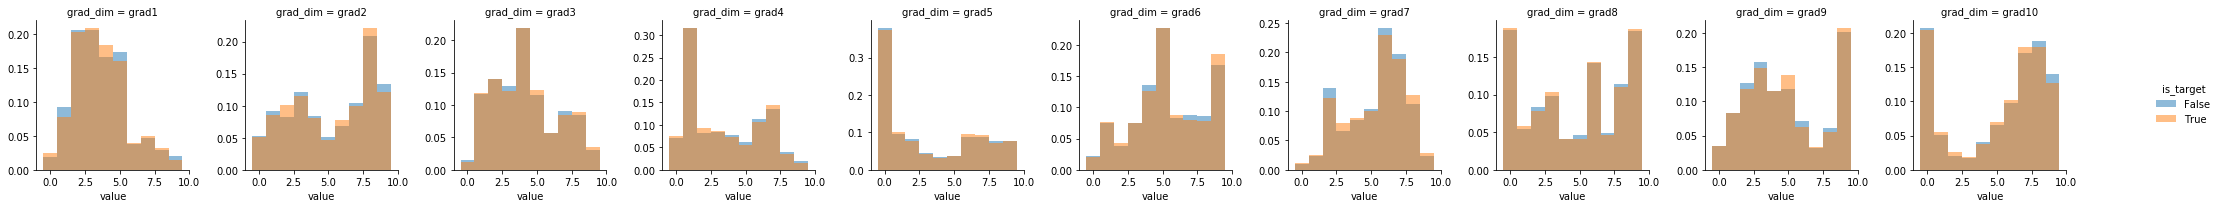

In [17]:
g = sb.FacetGrid(data_ef_ranks_long[data_ef_ranks_long.embdim.isin(list(range(1, 9)))], hue='is_target', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_ef) - .5)
g.add_legend()

Overlap embdims

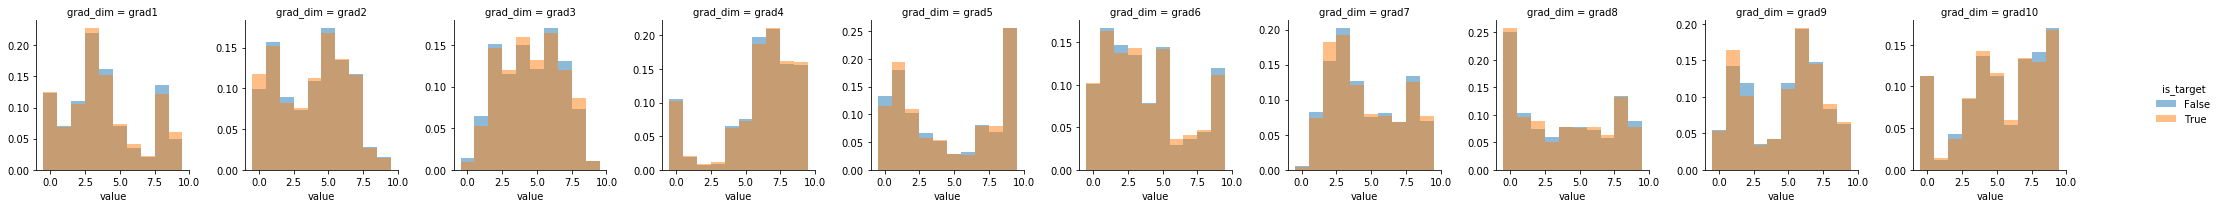

In [18]:
g = sb.FacetGrid(data_ef_ranks_long[data_ef_ranks_long.embdim.isin(list(range(9, 17)))], hue='is_target', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_ef) - .5)
g.add_legend()

**Now with ranks of `abs(grad)`**

In [11]:
data_ef_abs_ranks = ranks(data_ef, slice(0, ngrad_ef), transform=np.abs)
data_ef_abs_ranks_long = pd.melt(data_ef_abs_ranks, id_vars=['embdim', 'u', 'node', 'dist_u', 'is_target'],
                                 value_vars=["grad{}".format(i) for i in range(1, 1 + ngrad_ef)], var_name='grad_dim')

Adj-only embdims

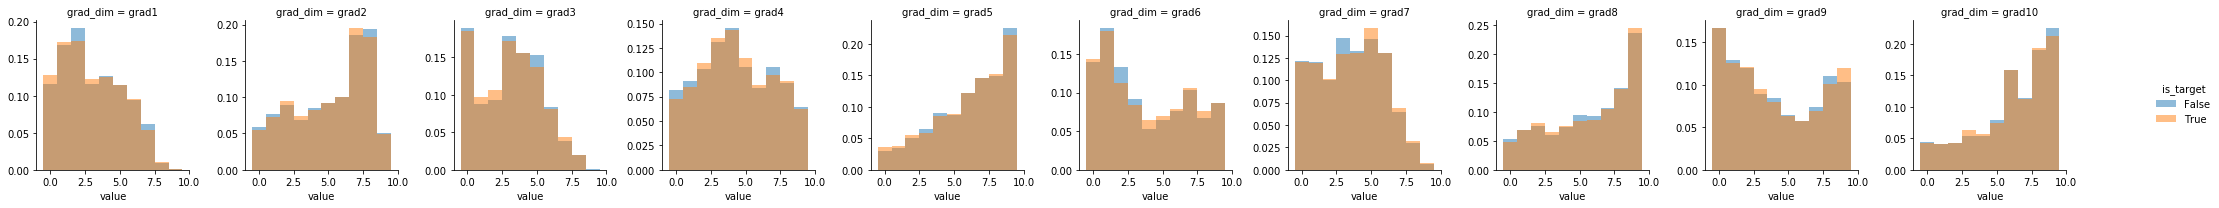

In [20]:
g = sb.FacetGrid(data_ef_abs_ranks_long[data_ef_abs_ranks_long.embdim.isin(list(range(1, 9)))], hue='is_target', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_ef) - .5)
g.add_legend()

Overlap embdims

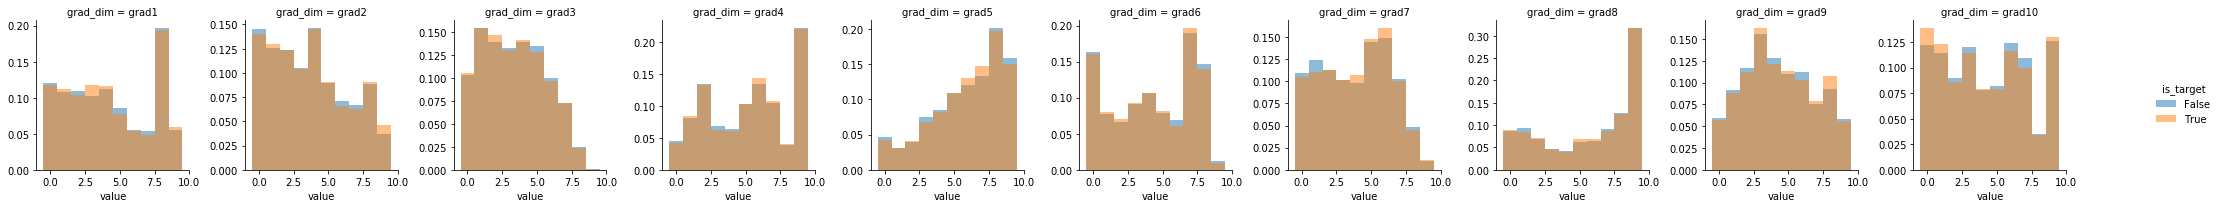

In [21]:
g = sb.FacetGrid(data_ef_abs_ranks_long[data_ef_abs_ranks_long.embdim.isin(list(range(9, 17)))], hue='is_target', col='grad_dim', sharey=False, margin_titles=True)
g.map(plt.hist, 'value', alpha=.5, density=True, bins=np.arange(1 + ngrad_ef) - .5)
g.add_legend()